#  **Le naufrage du Titanic**

Le naufrage le plus célèbre a eu lieu il y a tout juste 100 ans. Dans la nuit du 14 au 15 avril 1912, le paquebot de croisière Titanic a coulé au large de Terre-Neuve, près du Canada. C’est l’une des plus grandes catastrophes maritimes de l’histoire.

In [461]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,GridSearchCV,learning_curve
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

## 1. Chargement des données dans un DataFrame Pandas

In [275]:
data = pd.read_excel('titanic.xls')

In [276]:
data.head() #Affichage des 5 premieres lignes du dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [277]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Exploration des données

### Objectif :
    - Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
    - Développer une premiere stratégie de modélisation
#### Analyse de Forme :
    variable target : survived
    lignes et colonnes : 1309, 14
    types de variables : qualitatives : 8, quantitatives : 6
    Analyse des valeurs manquantes : 3855 valeurs manquantes
#### Analyse de Fond :
    Visualisation de la target : 38% de personnes sont survécu au naufrage de titanic (500 / 1309)

### Analyse de la forme des données

In [278]:
data.shape #lignes et colonnes

(1309, 14)

In [279]:
# types de variables
nbrOfQualitativeVariables = 0
for c in data.columns:
    if (data[c].dtype == np.object0) | (data[c].dtype == np.object_): 
        nbrOfQualitativeVariables = nbrOfQualitativeVariables + 1
        continue
    data_test = data[(data.loc[:,c] != 0) & (data.loc[:,c] != 1)]
    if data_test.shape[0] == 0 :
        nbrOfQualitativeVariables = nbrOfQualitativeVariables + 1
print('La nombre des variables qualitatives : ',nbrOfQualitativeVariables,'\n La nombre des variables quantitatives : ',data.shape[1]-nbrOfQualitativeVariables)

La nombre des variables qualitatives :  8 
 La nombre des variables quantitatives :  6


In [280]:
# Nombre total de valeurs manquantes pour chaque caractéristique
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

In [281]:
# Nombre total de valeurs manquantes
data.isna().sum().sum()

3855

### Analyse du Fond

#### Elimination des colonnes inutiles

In [282]:
data = data[data.columns[data.isna().sum()/data.shape[0] <0.4]] #Elimination des colonnes qui contiennent un pourcentage >= 0,4% de valeurs manquantes
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


On s'interesse dans ce nootbook que des variables pclass , survived , sex et age donc on élimine les autres

In [283]:
data = data.drop(['name','sibsp','parch','ticket','fare','embarked'],axis=1)
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [284]:
data.isna().sum()

pclass        0
survived      0
sex           0
age         263
dtype: int64

On élimine les lignes dans lesquelles il nous manque des données.
Il vaut mieux perdre un petit peu de données plutot de corrompre la rélité des choses

In [285]:
data.dropna(axis=0,inplace=True)
data.isna().sum()

pclass      0
survived    0
sex         0
age         0
dtype: int64

#### Examen de la colonne target

In [286]:
data['survived'].value_counts(normalize=True)

0    0.591778
1    0.408222
Name: survived, dtype: float64

#### histogrames des variables continues

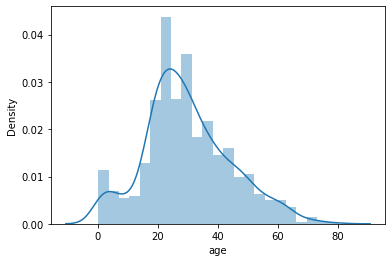

In [287]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.distplot(data[col])

#### histogrames des variables discretes

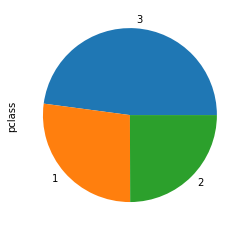

In [288]:
for c in data.columns:
    data_test = data[(data.loc[:,c] != 0) & (data.loc[:,c] != 1)]
    if((data_test.shape[0] != 0) & (len(data[c].value_counts()<10))):
        plt.figure()
        data[c].value_counts().plot.pie()

##### Variables Qualitatives

In [289]:
data['sex'].replace(['female','male'],[1,0],inplace=True)

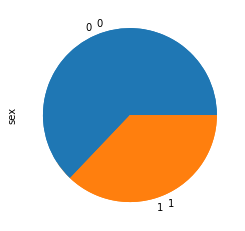

In [290]:
for c in data.columns:
    data_test = data[(data.loc[:,c] != 0) & (data.loc[:,c] != 1)]
    if(data_test.shape[0] == 0):
        data[c].value_counts().plot.pie()

# Modele de classification KNeighborsClassifier

### Création du modèle

In [423]:
model = KNeighborsClassifier(n_neighbors=7)

### Division de notre dataset en liste des features X et liste de target Y

In [424]:
Y = data['survived']

X = data.drop('survived',axis=1)

### Division de X et Y en sous ensemble train et test

In [425]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)

(836, 3)
(210, 3)


Text(0.5, 0, 'age')

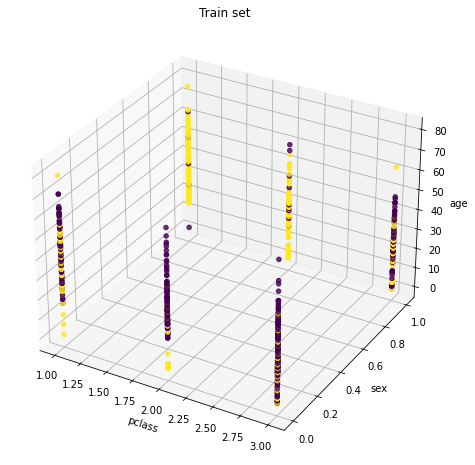

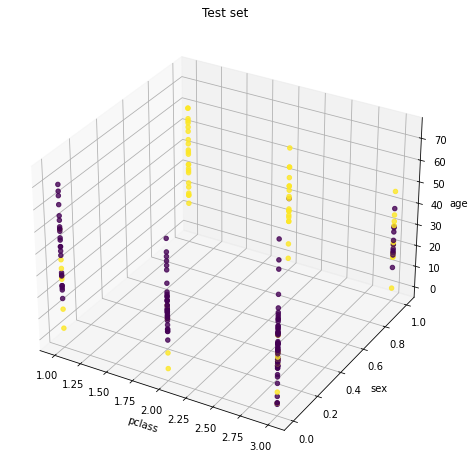

In [426]:
plt.figure(figsize=(18, 8))
ax = plt.axes(projection='3d')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2] , c=Y_train, alpha=0.8)
plt.title('Train set')
ax.set_xlabel('pclass')
ax.set_ylabel('sex')
ax.set_zlabel('age')
plt.figure(figsize=(18, 8))
ax = plt.axes(projection='3d')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=Y_test, alpha=0.8)
plt.title('Test set')
ax.set_xlabel('pclass')
ax.set_ylabel('sex')
ax.set_zlabel('age')

### Entrainement du modele

In [427]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

### Evaluation de la performance du modèle

In [428]:
print('Train score ',model.score(X_train,Y_train))
print('Test score ',model.score(X_test,Y_test))

Train score  0.8050239234449761
Test score  0.8095238095238095


### cross-validation
Est une méthode statistique qui permet d'évaluer la capacité de généralisation d’un modèle.

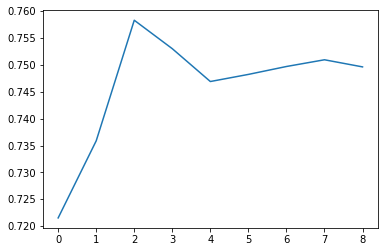

In [429]:
val_score = []
for i in range(1,10):
    val_score.append(cross_val_score(KNeighborsClassifier(i), X_train,Y_train, cv=50 ).mean())
    
plt.plot(val_score)

### validation_curve
Permet de calculer les scores pour un estimateur avec différentes valeurs d'un paramètre spécifié.Ceci est similaire à la recherche par grille avec un paramètre.Cependant,ceci calculera également les scores d'entraînement

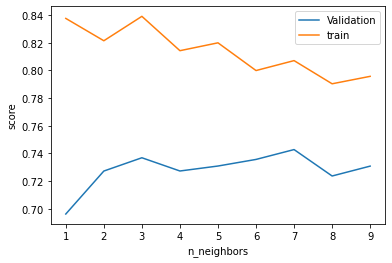

In [418]:
k = np.arange(1,10)

train_score, val_score = validation_curve(model, X_train, Y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='Validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

### GridSearchCV
Les modèles de régression (ou de classification) sont des fonctions mathématiques qui dépendent d’hyperparamètres . Le réglage  de ces hyperparamètres va impacter fortement le score final de ce modèle. 

GridSearchCV permet réaliser automatiquement la recherche des meilleurs hyperparamètres. L’utilisateur aura juste à préciser quels hyperparamètres il souhaite faire varier et leurs niveaux de variation et GridSearchCV déterminera automatiquement le meilleur réglage.

In [436]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [437]:
print(grid.best_score_)
print(grid.best_params_)

0.7476119190191046
{'metric': 'manhattan', 'n_neighbors': 7}


In [438]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.8238095238095238

### Learning Curve
En ML, on doit souvent disposer de plusieurs centaines ou milliers de données pour avoir un apprentissage avec un score de confiance suffisant. Cependant, la récolte de données peut être couteuse et nécessiter de réaliser de multiples essais. Il est donc intéressant de connaître la performance d’un modèle en fonction du nombre de données d’apprentissage afin de les limiter au strict nécessaire. On trace pour cela la Learning Curve qui montre l’évolution du score du modèle en fonction du nombre de données. 

[ 66  98 130 161 193 225 256 288 319 351 383 414 446 478 509 541 573 604
 636 668]


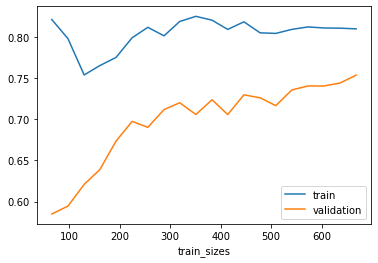

In [460]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

### Utilisation du modèle pour la prédiction

In [440]:
def survie(model,pclass=3,sex=1,age=23):
    x = np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [441]:
survie(model) 

[0]
[[0.57142857 0.42857143]]


In [455]:
predictions = model.predict(X_test)

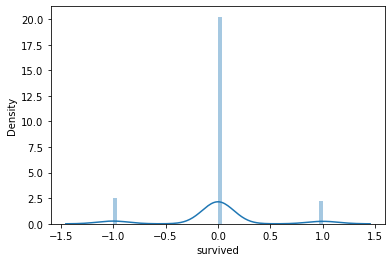

In [433]:
sns.distplot((Y_test-predictions),bins=50);

Text(0.5, 0, 'age')

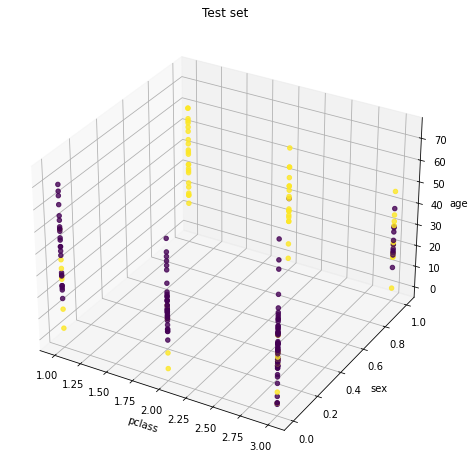

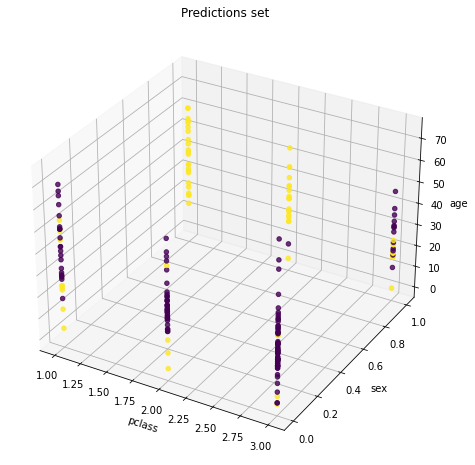

In [476]:
plt.figure(figsize=(18, 8))
ax = plt.axes(projection='3d')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2] , c=Y_test, alpha=0.8)
plt.title('Test set')
ax.set_xlabel('pclass')
ax.set_ylabel('sex')
ax.set_zlabel('age')
plt.figure(figsize=(18, 8))
ax = plt.axes(projection='3d')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=predictions, alpha=0.8)
plt.title('Predictions set')
ax.set_xlabel('pclass')
ax.set_ylabel('sex')
ax.set_zlabel('age')